# Logistic Regression with non-linear features

## import library

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [204]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)

print(number_data1)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64
1000


## plot the data

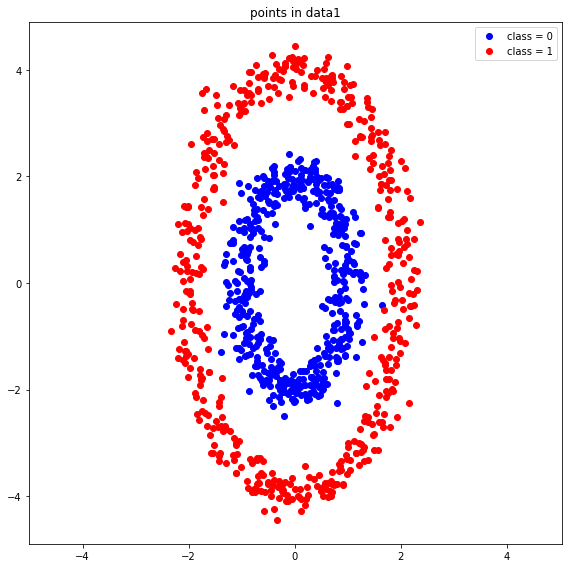

In [205]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

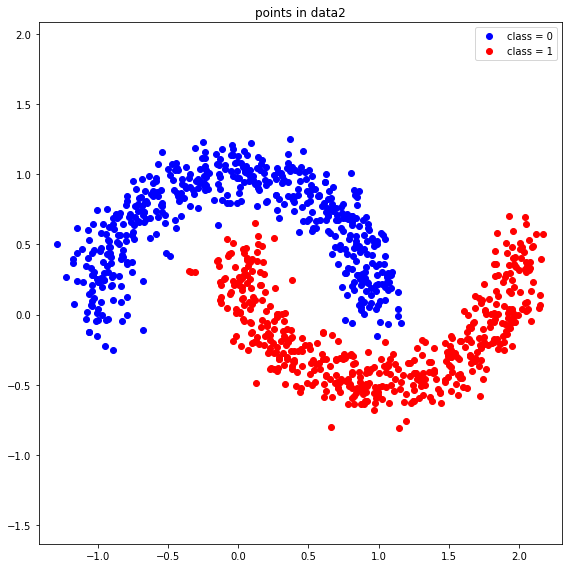

In [206]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [207]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # data1에 대하여,, k(x,y)  = (1, k1(x,y), k2, k3 ,,,,)
    # 임의의 k개(강의에선 p) (내가 정하기)

    num_data        = len(point)
    num_feature     = 15

    x = point[:,0]
    y = point[:,1]

    feature         = np.ones((num_data, num_feature))
    feature[:,1]    = x
    feature[:,2]    = y
    feature[:,3]    = np.power(x, 2)
    feature[:,4]    = np.power(y, 2)
    feature[:,5]    = np.multiply(x, y)
    feature[:,6]    = np.power(x, 3)
    feature[:,7]    = np.power(y, 3)
    feature[:,8]    = np.power(y, 4)
    feature[:,9]    = np.power(y, 4)
    feature[:,10]    = np.power(y, 5)
    feature[:,11]    = np.power(y, 5)
    feature[:,12]    = np.multiply(np.power(x, 2), np.power(y, 2))
    feature[:,13]    = np.multiply(np.power(x, 3), np.power(y, 3))
    feature[:,14]   = np.multiply(np.power(x, 4), np.power(y, 4))


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [208]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # data2에 대하여,,

    num_data        = len(point)
    num_feature     = 15

    x = point[:,0]
    y = point[:,1]

    feature         = np.ones((num_data, num_feature))
    feature[:,1]    = x
    feature[:,2]    = y
    feature[:,3]    = np.multiply(x, y)
    feature[:,4]    = np.power(x, 2)
    feature[:,5]    = np.power(y, 2)
    feature[:,6]    = np.power(x, 3)
    feature[:,7]    = np.power(y, 3)
    feature[:,8]    = np.power(x, 4)
    feature[:,9]    = np.power(y, 4)
    feature[:,10]    = np.power(y, 5)
    feature[:,11]    = np.power(y, 5)
    feature[:,12]    = np.multiply(np.power(x, 2), np.power(y, 2))
    feature[:,13]    = np.multiply(np.power(x, 3), np.power(y, 3))
    feature[:,14]   = np.multiply(np.power(x, 4), np.power(y, 4))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [209]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # thetaT * k(x,y)
    value = np.dot(theta, feature.T)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [210]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 
    value = 1 / (1 + np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [211]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 로 * thetaT * k(x,y)
    # 로 * compute_linear_regression

    z = compute_linear_regression(theta, feature)
    value = sigmoid(z)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [212]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # hi = compute_logistic_regression
    # ri(theta) = r(thetai, xi, yi, li) = -li * log(hi) - (1-li) * log(l-hi)

    h2 =  compute_logistic_regression(theta, feature)
    #residual = -label * np.log(h2) - (1-label) * np.log(1-h2)
    
    residual = -label * np.log(h2, where=h2!=0) - (1-label) * np.log(1- h2, where=(1-h2)!=0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [213]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 평균값 찾기
    # 모든 [ -li * log(hi) - (1-li) * log(l-hi) 값 ] / n개
    # compute_residual / n
    #loss = np.sum(compute_residual(theta, feature, label)) / point.shape[0]

    #loss_sample = compute_residual(theta, feature, label)
    #loss2        = np.average(loss_sample)

    #loss = np.sum(compute_residual(theta, feature, label)) / len(data1_point_x)

    num = feature.shape[0]
    loss = np.sum(compute_residual(theta, feature, label)) / num
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [214]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #num_data = len(label)
    #reg =  compute_logistic_regression(theta, feature)
    #residual    = reg - label # 안맞음

    #gradient_sum    = np.matmul(np.transpose(residual), feature)
    #gradient        = gradient_sum / num_data
    #gradient        = np.transpose(gradient)

    num2    = feature.shape[0]
    h = compute_logistic_regression(theta, feature)
    
    gradient = np.dot(feature.T, (h - label)) / num2

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [215]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # h(theta,x,y) >= 0.5 면? l(x,y) = 1
    # h(theta,x,y) < 0.5 면? l(x,y) = 0
    # accuracy = 정확한 포인트의 수 / 전체 포인트의 수
    # 모두 맞았다면? accuracy = 1, 모두 틀렸다면? = 0

    #regression  = compute_linear_regression(theta, feature)
    prediction  = compute_logistic_regression(theta, feature)

    upper       = 1
    threshold   = 0.5
    lower       = 0
    
    prediction_label = np.where(prediction > threshold, upper, lower)
    accuracy = np.sum(label == prediction_label) / len(label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [216]:
data1_number_iteration   = 100 # 값 바꾸기(가장 높은 accuracy와 가장 낮은 loss르 얻을 수 있는 값으로 수정하기)
data2_number_iteration   = 100 # 값 바꾸기

data1_learning_rate   = 0.55 # 바꾸기
data2_learning_rate   = 0.55 # 바꾸기

data1_number_feature    = 15 # 바꾸기 // feature 함수의 수
data2_number_feature    = 15 # 바꾸기

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [217]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # data1에 대한
    # theta1 = 모델 파라미터 업뎃하기
    # loss = 업뎃한 theta보다 
    # acciracy = update된 값들에 인해 각각의 iteration 마다 값 구해서 저장
    feature1 = compute_feature1(data1_point)
    theta1  = theta1 - data1_learning_rate * compute_gradient(theta1, feature1, data1_label)
    
    loss1       = compute_loss(theta1, feature1, data1_label)
    accuracy1   =  compute_accuracy(theta1, feature1, data1_label)

    # 최소화 하는 값 thetai 찾아서 compute_logistic_regression 값 계산
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

/var/folders/52/r9wcmj45755dzgj78dzzld200000gp/T/ipykernel_47082/831337692.py:6: RuntimeWarning: overflow encountered in exp
  value = 1 / (1 + np.exp(-z))
/var/folders/52/r9wcmj45755dzgj78dzzld200000gp/T/ipykernel_47082/449167753.py:11: RuntimeWarning: invalid value encountered in multiply
  residual = -label * np.log(h2, where=h2!=0) - (1-label) * np.log(1- h2, where=(1-h2)!=0)


In [218]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature2 = compute_feature2(data2_point)
    theta2      = theta2 - data2_learning_rate * compute_gradient(theta2, feature2 , data2_label)
    loss2       = compute_loss(theta2, feature2, data2_label)
    accuracy2   = compute_accuracy(theta2, feature2, data2_label)

    # 1~4번까지 차등점수**
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

___

## functions for presenting the results

___

___

In [219]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [220]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [221]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [222]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [223]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [224]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [225]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [226]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [227]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # linear_regression = 0이되는 점은 검은색 선으로 그리기
    # 각각 포인트도 색으로 표현하기

    x = XX.ravel()
    y = YY.ravel()
    xyt =np.array([x,y]).T

    feature = compute_feature1(xyt)
    reg  = compute_linear_regression(data1_theta_optimal,feature)
    regression  = np.reshape(reg, XX.shape)
    

    plt.contourf(XX, YY, regression, levels=100, cmap='RdBu_r')
    
    plt.colorbar()

    plt.contour(XX, YY, regression, levels=0, colors='black' )

    plt.plot(data1_point_x_class_0, data1_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, '.', color='red', label='class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [228]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    #XX   = np.matrix.flatten(grid_X)
    #YY   = np.matrix.flatten(grid_Y)
    
    #feature = feature_function2(XX, YY)

    #regression  = regression_function(theta, feature)
    #prediction  = logistic_function(regression)

    #regression  = np.reshape(regression, XX.shape)
    #prediction  = np.reshape(prediction, XX.shape)

    # 과제8 비슷
    x = XX.ravel()
    y = YY.ravel()
    xyt =np.array([x,y]).T

    feature = compute_feature2(xyt)
    reg  = compute_linear_regression(data2_theta_optimal,feature)
    regression  = np.reshape(reg, XX.shape)
    

    plt.contourf(XX, YY, regression, levels=100, cmap='RdBu_r')

    plt.colorbar()

    plt.contour(XX, YY, regression, levels=0, colors='black' )

    plt.plot(data2_point_x_class_0, data2_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, '.', color='red', label='class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [229]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = XX.ravel()
    y = YY.ravel()
    xyt =np.array([x,y]).T

    feature = compute_feature1(xyt)
    
    reg  = compute_logistic_regression(data1_theta_optimal,feature)
    regression  = np.reshape(reg, XX.shape)
    

    plt.contourf(XX, YY, regression, levels=100, cmap='RdBu_r')
    plt.colorbar()

    plt.plot(data1_point_x_class_0, data1_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, '.', color='red', label='class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [230]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = XX.ravel()
    y = YY.ravel()
    xyt = np.array([x,y]).T

    feature = compute_feature2(xyt)
    reg  = compute_logistic_regression(data2_theta_optimal,feature)
    regression  = np.reshape(reg, XX.shape)
    

    plt.contourf(XX, YY, regression, levels=100, cmap='RdBu_r')
    
    plt.colorbar()


    plt.plot(data2_point_x_class_0, data2_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, '.', color='red', label='class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.9908729687
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.1813611529
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9010000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9350000000
**************************************************
## [RESULT 05]
**************************************************


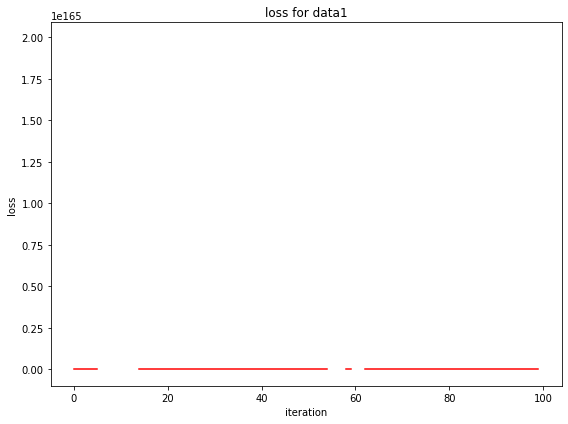

**************************************************
## [RESULT 06]
**************************************************


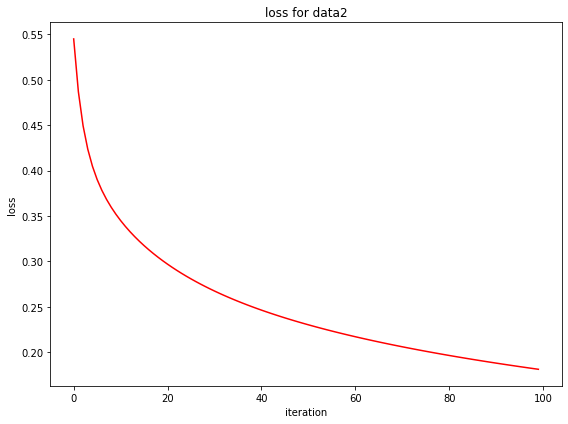

**************************************************
## [RESULT 07]
**************************************************


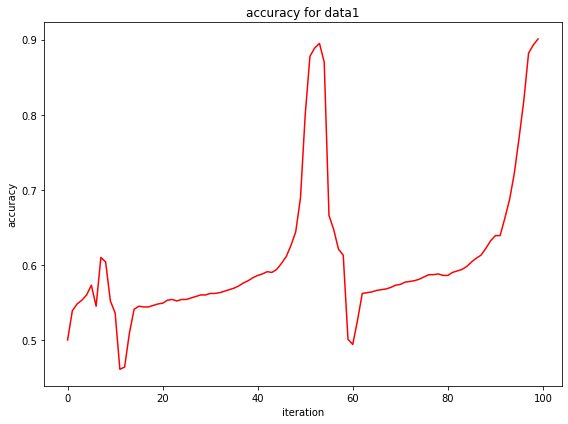

**************************************************
## [RESULT 08]
**************************************************


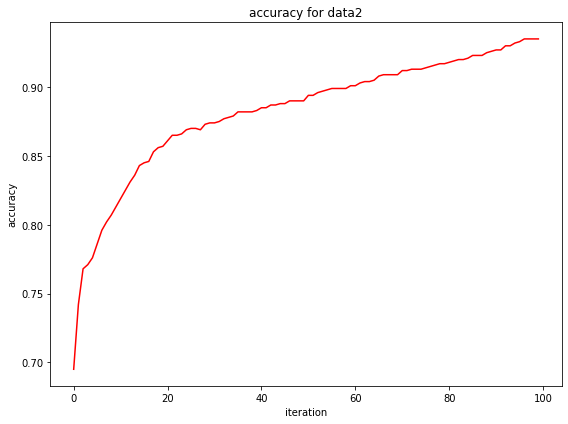

**************************************************
## [RESULT 09]
**************************************************


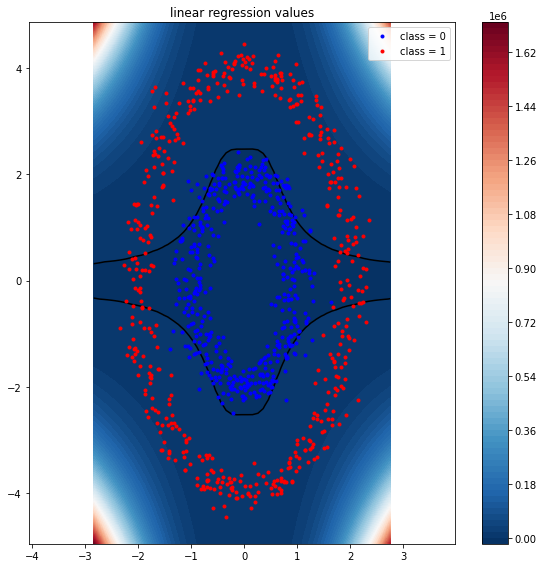

**************************************************
## [RESULT 10]
**************************************************


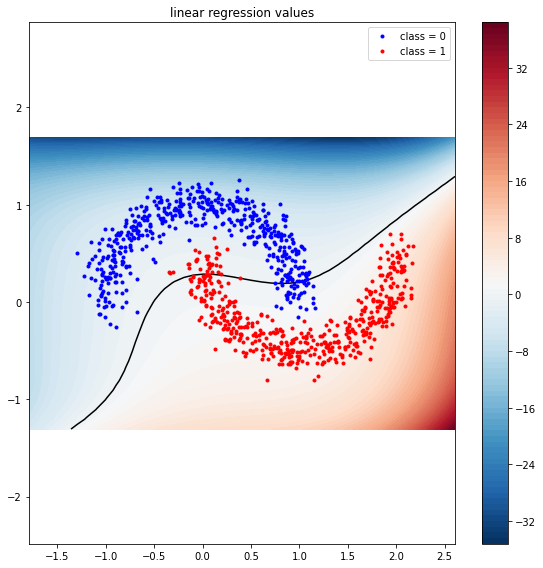

**************************************************
## [RESULT 11]
**************************************************


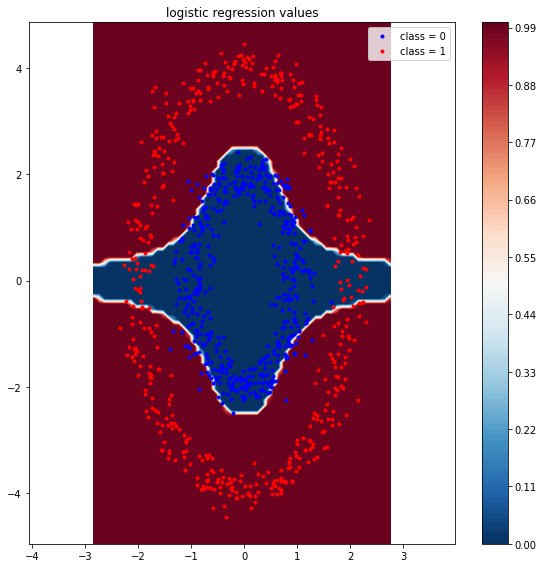

**************************************************
## [RESULT 12]
**************************************************


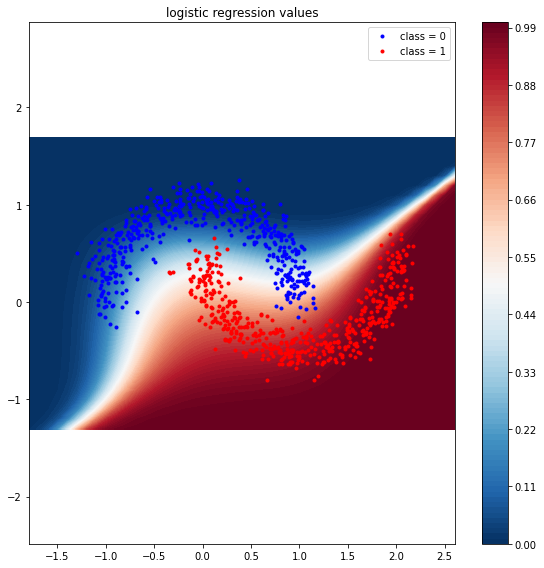

In [231]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)